# <FONT COLOR="BLUE">RETAIL ANALYSIS</FONT>
# <FONT COLOR="BLUE">DEVENDRA KANDPAL</FONT>
# <FONT COLOR="BLUE">THE SPARK FOUNDATION </FONT>

# <font color="green"> RETAIL ANALYSIS </font>
## Data Description
From the data we get to the following things:
* <b> Ship Mode: </b> tells the way the material is being shipped. It has 4 variables, that is First class, Second Class, Same day and Standard Class.
* <b> Segments: </b> tells us about the segments in which the customers is been divided. It has 3 variables that is , Consumer, Corporate and Home Office.
* <b> Country: </b> The Country involvents in trading. It has only one Country that is United States.
* <b> States: </b> Gives all the names of the statesbthat are involved in trading.
* <b> Postal Code: </b> Codes that uniquely define the areas.
* <b> Region: </b> The country is divided into region for ease of analysis. The regions are East, West, Central and South.
* <b> Category: </b> Category of the product that is beig sold.There are mainy 3 categories they are Office Supplies, Technology and Furniture.
* <b> Sub Category: </b> This tells us about the information of the product category.
* <b> Sales: </b> Tell us about the individual price of each sub product in a particular region.
* <b> Quantity: </b> Tells us about the quantity of Product being sold.
* <b> Discount: </b> This tells us about the Discount given in a product.
* <b> Profit: </b> This tells us about the profit generated in a trade. 
## OBJECTIVE
* To find the weak areas and how to correct it

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<b> Importing all the necessary library for analysis</b>

In [2]:
retail=pd.read_csv("E:\devendra\data analysis devendra work\internship grip\RETAIL ANALYSIS\SampleSuperstore.csv")
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<b> The first 5 column is displayed. This shows that the data has been successfully retrived.</b>  
<b>Now checking for all null and unique values. </b>

In [3]:
retail.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
retail.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<b> Thus no null values. Which is great.  
Renaming all column for ease to access.</b>

In [5]:
dict={'Ship Mode':'ship_mode'}
retail.rename(columns=dict,inplace=True)

In [6]:
dict={'Postal Code':'pin_code'}
retail.rename(columns=dict,inplace=True)

In [7]:
dict={'Sub-Category':'Scategory'}
retail.rename(columns=dict,inplace=True)

In [8]:
dict={'Sales':'sales_amount'}
retail.rename(columns=dict,inplace=True)

<b> Displaying the data again to confirm that the name changed</b>

In [9]:
retail.head(5)

,ship_mode,Segment,Country,City,State,pin_code,Region,Category,Scategory,sales_amount,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<b> Calculating the unique value form each column </b>

In [10]:
retail.nunique()

ship_mode          4
Segment            3
Country            1
City             531
State             49
pin_code         631
Region             4
Category           3
Scategory         17
sales_amount    5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

<b>Name of the column is successfully changed.  
Now retriving all the unique value from the columns</b>

In [11]:
retail['ship_mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [12]:
retail['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [13]:
retail['Country'].unique()

array(['United States'], dtype=object)

In [14]:
retail['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [15]:
retail['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [16]:
retail['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [17]:
retail['Scategory'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [18]:
retail['Quantity'].unique()

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12],
      dtype=int64)

In [19]:
retail['Discount'].unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

In [20]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ship_mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   pin_code      9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Scategory     9994 non-null   object 
 9   sales_amount  9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


<b> Statistics information of the data </b>

In [21]:
retail.describe()

,pin_code,sales_amount,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Exploratory Data Analysis (EDA)

## Univariant Analysis

In [22]:
def count(column1):
    plt.figure(figsize=(15,6))
    plot=sns.countplot(x=column1,data=retail)
    plt.xlabel(f'{column1}',fontsize=16)
    plt.ylabel('Total Number',fontsize=16)
    plt.title('Distribution of {}'.format(column1),fontsize=20)

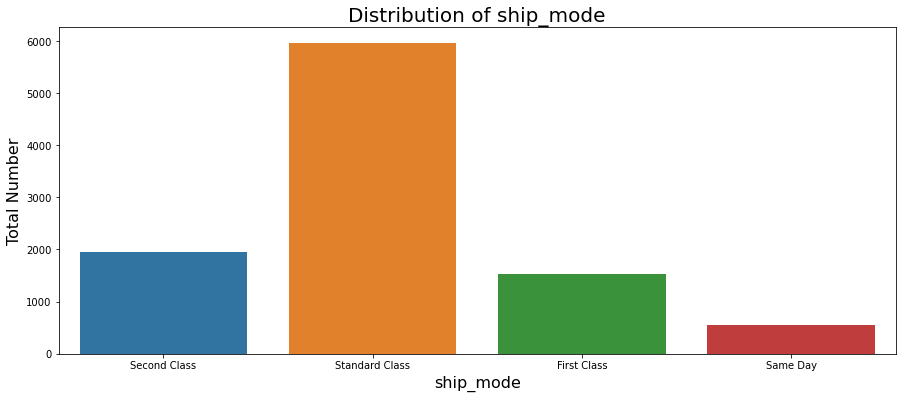

In [23]:
count('ship_mode')

Clearly see that Maximum number of shipment is arrived through <b>Standard Class</b> followed by <b>Second Class </b> 

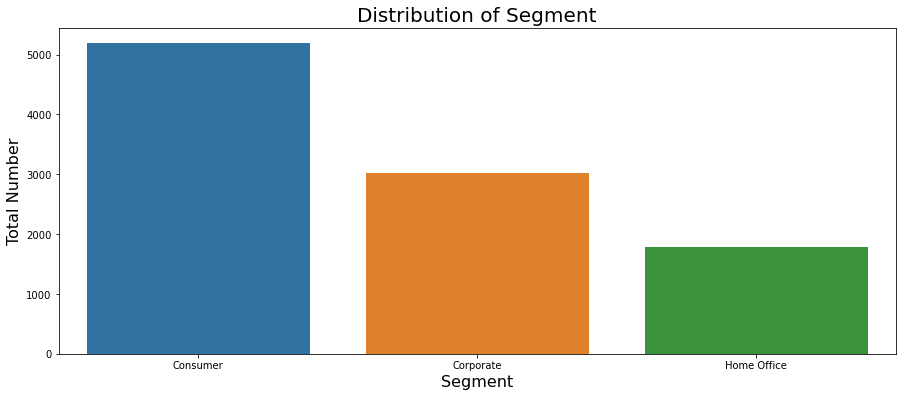

In [24]:
count('Segment')

The Segment of <b>Consumer </b> is the highest followed by <b>Corporate </b> and least by <b>Home Office. </b>

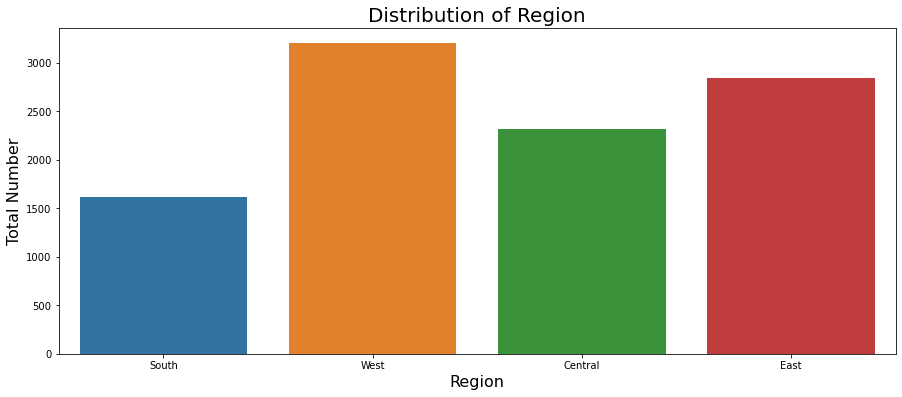

In [25]:
count('Region')

Clearly maximum amount of googs is being sold to <b>West</b> followed by <b>East and Central </b> and least sold to <b>South </b> Region</b>.

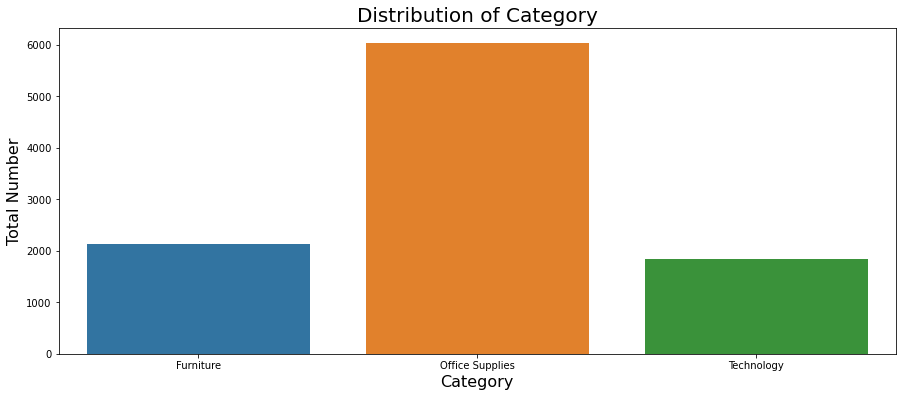

In [26]:
count('Category')

<b> Office Supplies </b> received the maximum amount of goods while the Technology received the least amount of goods.

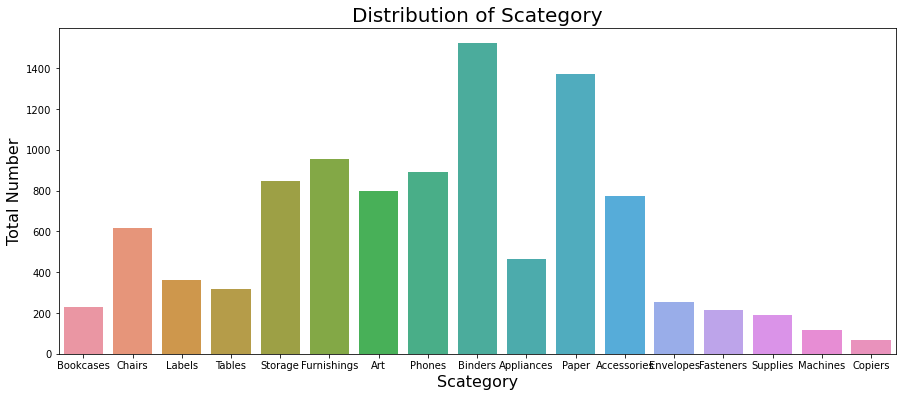

In [27]:
count('Scategory')

In the sub category <b>Binders</b> received maximum amount of goods while <b>Copiers</b> received least amount of goods.

## Let's we find the relation between the Numeric Values

In [28]:
def scatterplot(column1,column2):
    plt.figure(figsize=(15,6))
    plt.scatter(x=column1,y=column2,data=retail,color='red')
    plt.xlabel(f'{column1}',fontsize=16)
    plt.ylabel(f'{column2}',fontsize=16)
    plt.title('Distribution of {} and {}'.format(column1,column2),fontsize=20)
    plt.grid()

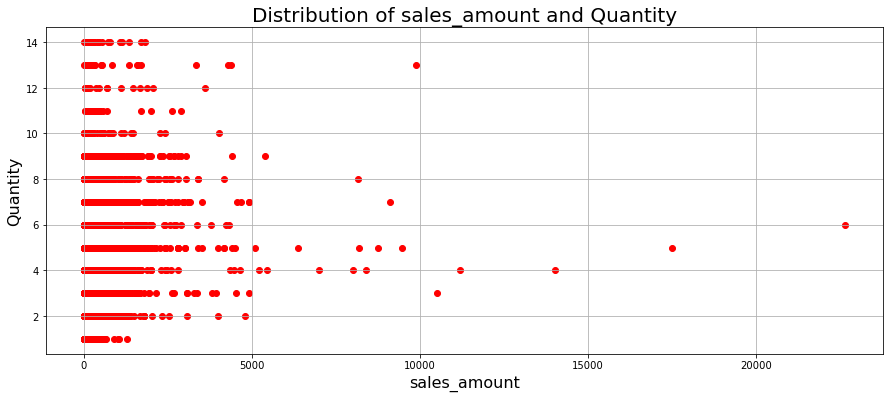

In [29]:
scatterplot('sales_amount','Quantity')

<b> We can see that people took all those things which are almost free more as compared to those which cost high.  
    Also very few people bought that item which cost very high.  
    Through this we can come to the conclusion that people run after fleast cost Items</b>

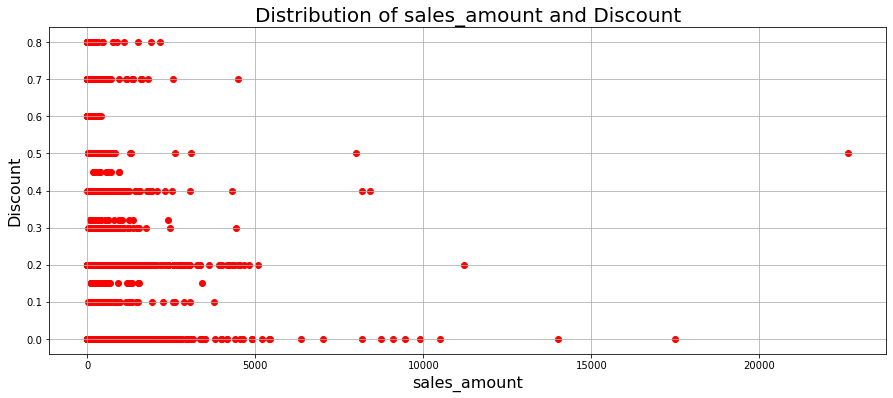

In [30]:
scatterplot('sales_amount','Discount')

<b> we can assume that quantity of the product is good that's why people are buying things even when there is no discount in it</b>

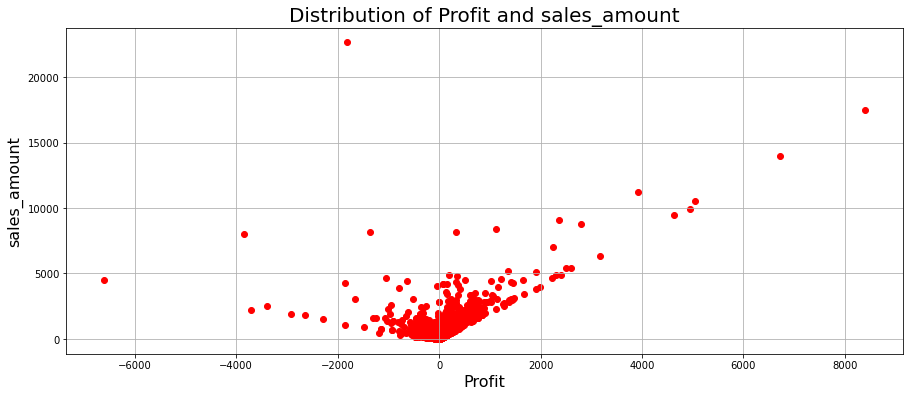

In [31]:
scatterplot('Profit','sales_amount')

<b> In this case we can say that when the sales amount is between 6000 - 10000 we are getting high profit.  
    But we have to deep dive to get more information</b>

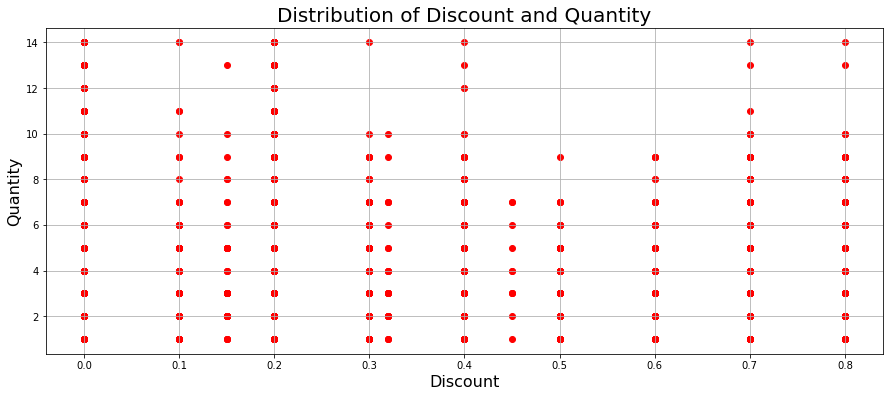

In [32]:
scatterplot('Discount','Quantity')

<b> The data is almost evenly distributed and and we just cannot make insight from it. </b>

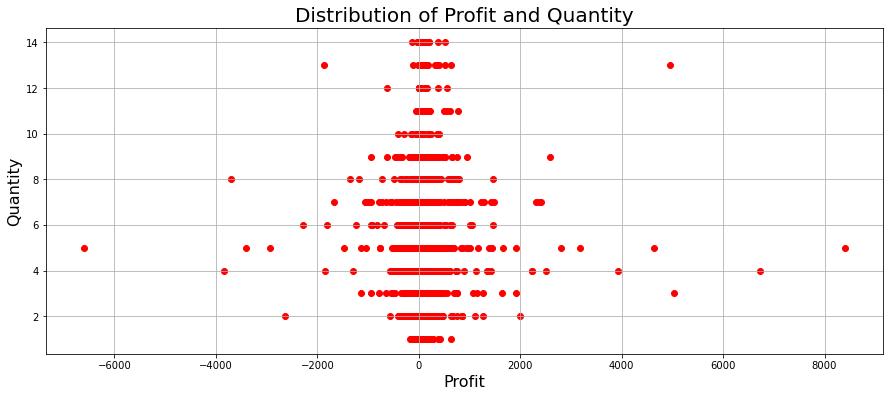

In [33]:
scatterplot('Profit','Quantity')

<b> We are not able to make the perfect outcome as the data is evenly distributed. </b>

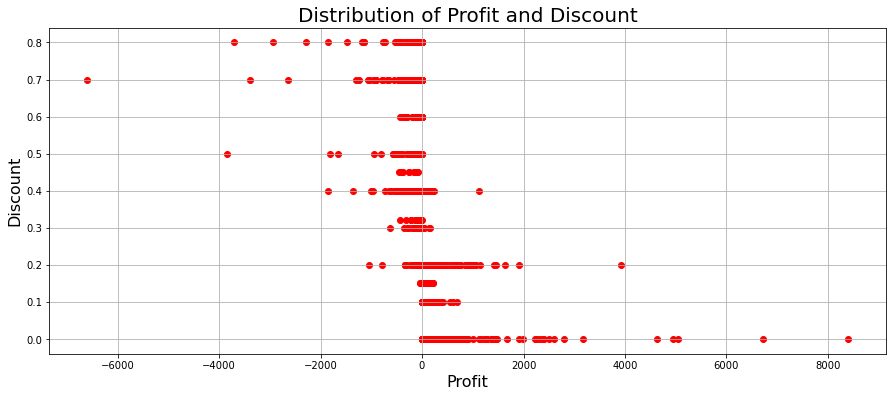

In [34]:
scatterplot('Profit','Discount')

<b> Its is very much clear that, when the discount exceeds more than 25% the Profit turned to losses</b>

In [35]:
retail[['total price','total discount','total profit']]=retail[['sales_amount','Discount','Profit']].multiply(retail['Quantity'],axis='index')

<b> Multiplied the total quantity sold by the actual price, Discount price and profit to get the overall result

In [36]:
retail.head(10)

,ship_mode,Segment,Country,City,State,pin_code,Region,Category,Scategory,sales_amount,Quantity,Discount,Profit,total price,total discount,total profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,523.9200,0.00,83.8272
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,2195.8200,0.00,658.7460
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,29.2400,0.00,13.7428
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,4787.8875,2.25,-1915.1550
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,44.7360,0.40,5.0328
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,342.0200,0.00,99.1858
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656,29.1200,0.00,7.8624
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152,5442.9120,1.20,544.2912
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825,55.5120,0.60,17.3475
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700,574.5000,0.00,172.3500


<b>Now we can see that overall result were generated. NOw here we can play with these value and plot a graph accordingly.</b>

## Multi Variant Analysis

In [37]:
def count2(column1,column2,table):
    fig,ax=plt.subplots(figsize=(15,6))
    plot=sns.barplot(x=column1,y=column2,data=table ,ax=ax, ci=None)
    plt.xlabel(f'{column1}',fontsize=16)
    plt.ylabel(f'{column2}',fontsize=16)
    plt.title('Distribution of {} and {}'.format(column1,column2),fontsize=20)
    plt.grid()

In [38]:
def squarebox(column1,column2):
    plt.figure(figsize=(15,6))
    plot=sns.boxplot(x=column1,y=column2,data=retail)
    plt.xlabel(f'{column1}',fontsize=16)
    plt.ylabel(f'{column2}',fontsize=16)
    plt.title('Distribution of {} and {}'.format(column1,column2),fontsize=20)
    plt.grid()

## Calculating for SHIPPING MODE

In [39]:
ship_mode_details=retail.groupby(['ship_mode'])[['total price','Quantity','total profit']].sum().reset_index()

In [40]:
ship_mode_details.head()

,ship_mode,total price,Quantity,total profit
0,First Class,1.624621e+06,5693,229806.6941
1,Same Day,5.877347e+05,1960,75580.5179
2,Second Class,2.377170e+06,7423,265927.1510
3,Standard Class,6.898536e+06,22797,859114.2147


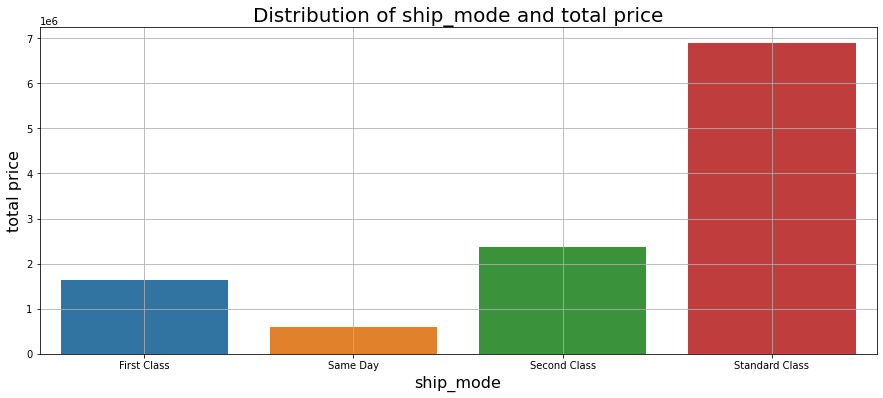

In [41]:
count2('ship_mode','total price',ship_mode_details)

<b>The sales amount Made by selling to Standard Class People is very much. While through Same day delivering are generating very low revenue.</b>

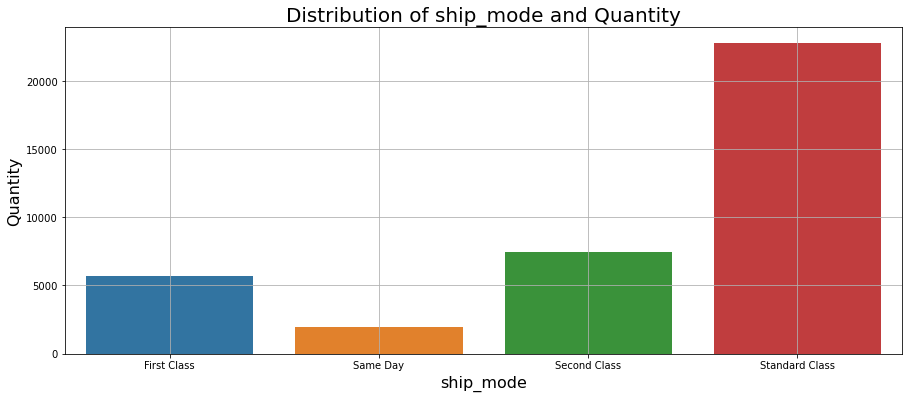

In [42]:
count2('ship_mode','Quantity',ship_mode_details)

<b> Standard are ordering very huge amount of goods whereas Same day class of people are ordering very less amount of goods</b>

In [43]:
discountt=retail.drop_duplicates('ship_mode').groupby(['ship_mode'])['Discount'].mean().reset_index()

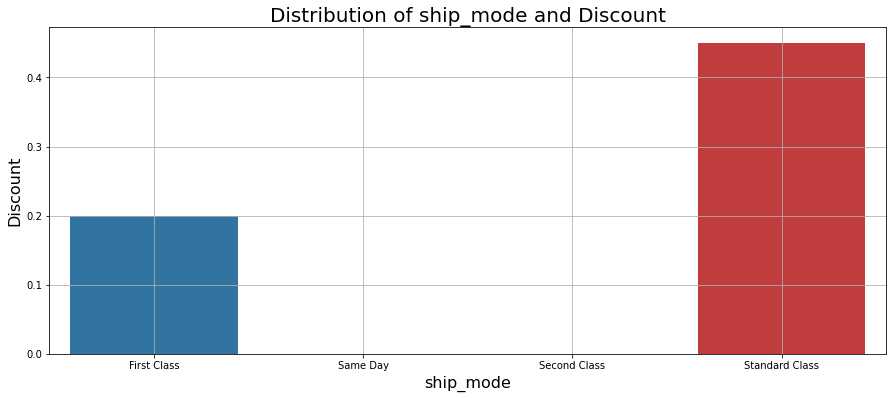

In [44]:
count2('ship_mode','Discount', discountt)

<b> Ohhh......I got the reason why people are more on Standard and why they buy more things. It is mainly because of the fact that they are getting heavy discount </b>

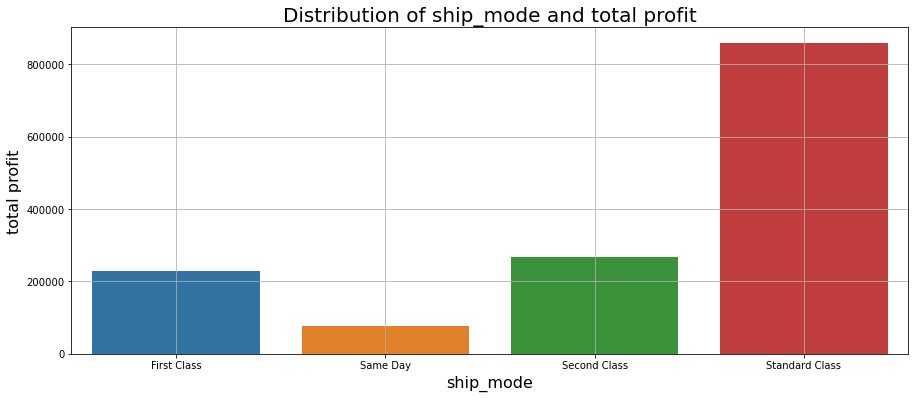

In [45]:
count2('ship_mode','total profit', ship_mode_details)

## <font color="red">Conclusion on SHIP MODE </font>
<b> In  the standard mode there is a very high discount that's why people buy nore goods from Standard mode as compared to other mode  
    Although the discount is given to FIRST Class, though their profit is less as compared to Second Class</b>

## Calculating for SEGMENT

In [46]:
segment_details = retail.groupby(['Segment'])[['total price','Quantity','total profit']].sum().reset_index()

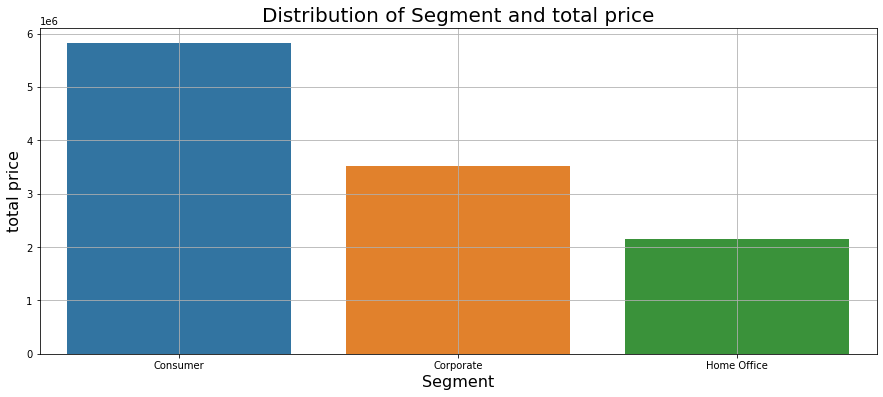

In [47]:
count2('Segment','total price',segment_details)

<b>the maximum goods and maximum earning is made by selling to Consumers and least by Home office</b>

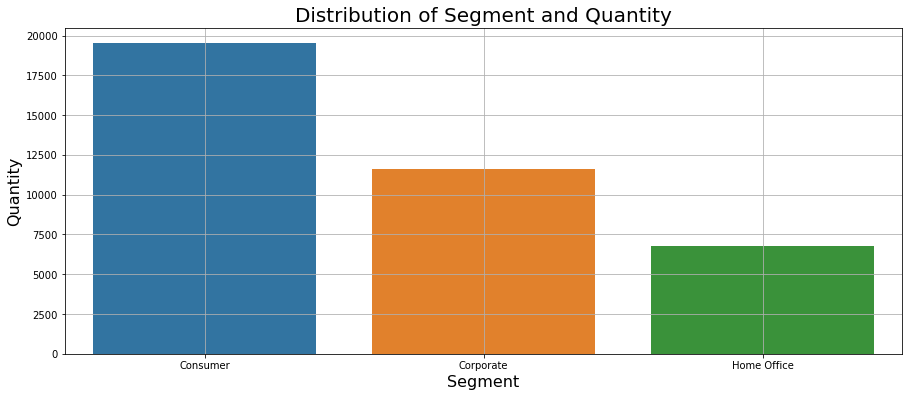

In [48]:
count2('Segment','Quantity',segment_details)

<b> It is very obvoius that the maximum profit is generated by selling the maximum goods that is to the consumer and least to Home office</b>

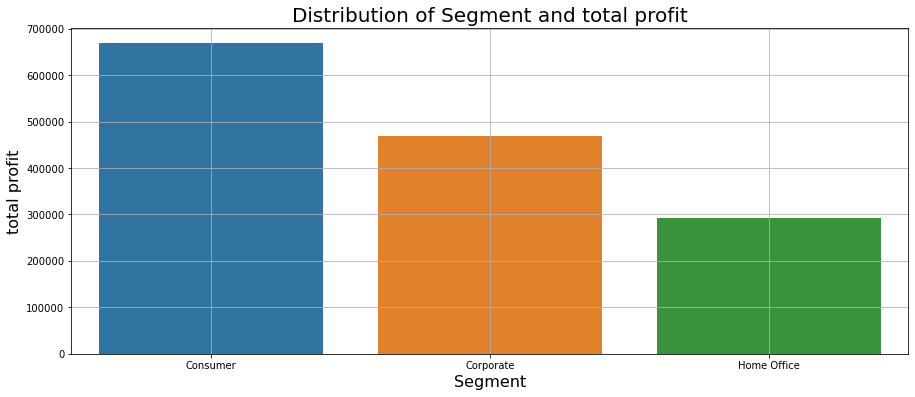

In [49]:
count2('Segment','total profit',segment_details)

<b>The maximum Profit is generated through Consumer segment followed by Corporate and Home Office </b>

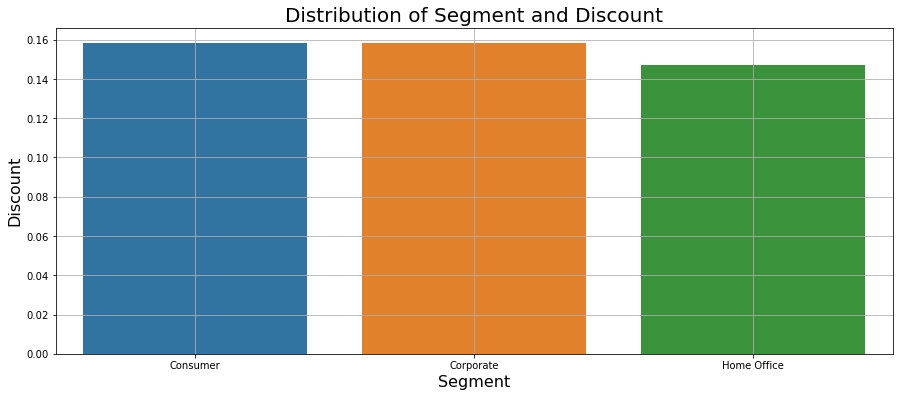

In [50]:
segment_details_discount=retail.groupby(['Segment'])['Discount'].mean().reset_index()
count2('Segment','Discount',segment_details_discount)

<b>The discount given to segments Consumer and Corporate are almost equal. However the Discount given to Home Office is much less that other 2</b>

## <font color="red">CONCLUSION on SEGMENT</font>
<b> Though there is equal amount of discount is given to both COnsumer and Corporate then also Corporate unable to make profit.  
    The reason is that the quantity is being supplied to Corporate is less than that of Consumer.</b>

## Checking Statewise 

In [51]:
statewise=retail.groupby(['State'])[['Quantity']].sum().reset_index().sort_values('Quantity',ascending=False)[:20]
statewise_profit=retail.groupby(['State'])[['total profit']].sum().reset_index().sort_values('total profit',ascending=True)[:20]
statewise_price=retail.groupby(['State'])[['total price']].sum().reset_index().sort_values('total price',ascending=False)[:20]
statewise_discount=retail.groupby(['State'])[['Discount']].mean().reset_index().sort_values('Discount',ascending=False)[:20]

In [52]:
def count3(column1,column2,table):
    fig,ax=plt.subplots(figsize=(15,6))
    plot=sns.barplot(x=column1,y=column2,data=table,ax=ax)
    plt.xlabel(f'{column1}',fontsize=16)
    plt.ylabel(f'{column2}',fontsize=16)
    plt.title('Distribution of {} VS {}'.format(column1,column2),fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    plt.grid()

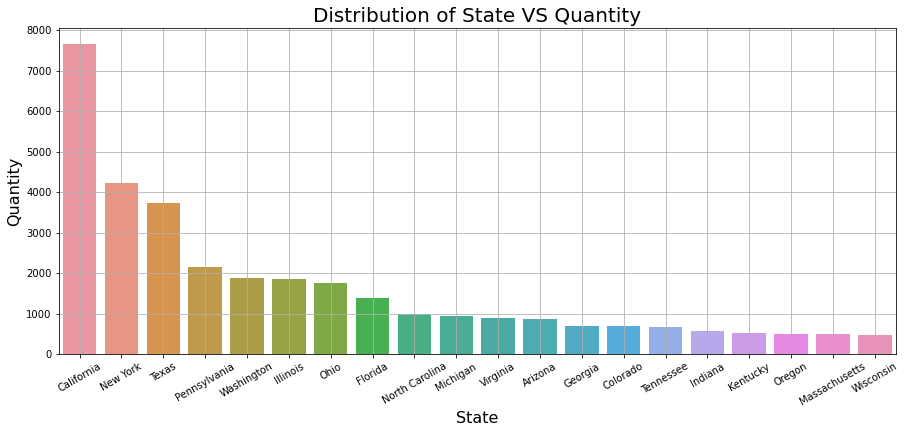

In [53]:
count3('State','Quantity',statewise)

<b> It is very much clear that Quantity sold in Wyoming is very less.  
    Its is followed by West Viriginia then from North Dakotha onwards the Quantity sold rised rapidly. </b>

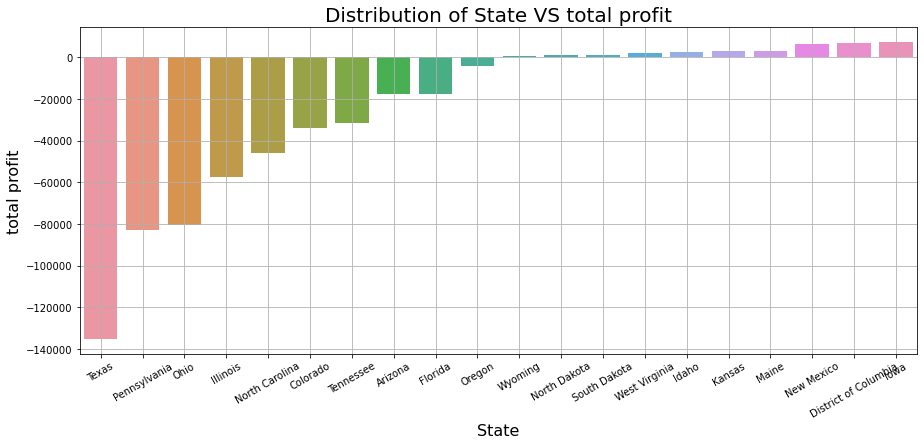

In [54]:
count3('State','total profit',statewise_profit)

<b> From the graph it is very much clear that the maximum Loss occur in the state of Texas which is around 135000.  
    Texas is followed by Pennsyivania followed by Ohio. After the state Wyoming the states showed positive trends.</b>

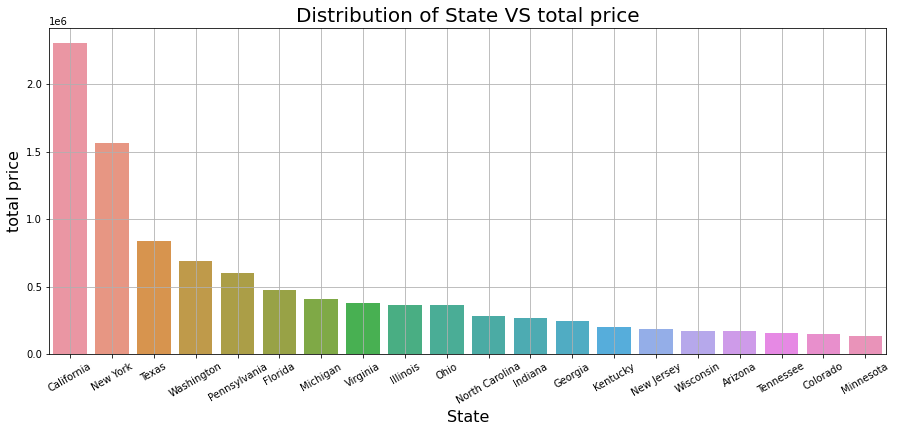

In [55]:
count3('State','total price',statewise_price)

<b> The maximum Sales is done in the State of California followed by New York.  
    After New York the sales declines rapidly.  
Whereas the minimum sales is done in the country of North Dakota followed by South Dakota.  
    From West Virginia onwards the sales keeps on increasing.
</b>

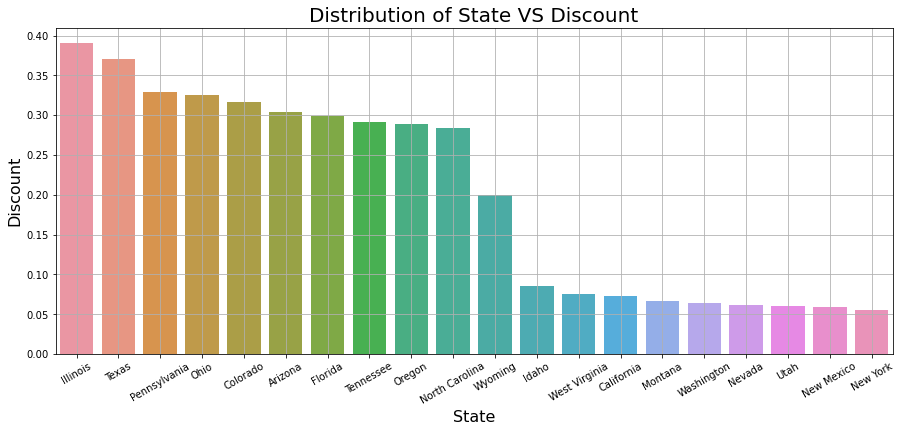

In [56]:
count3('State','Discount',statewise_discount)

<b> The maximum Discount is given to Illinious followed by Texas, and so on.
    It is also very much important to note that there are many countries who have been given ZERO Discount</b>

### Conclusion of the State Analysis
<b> The countries who have enjoyed maximum discount also given the most Negative Return. For example Illinois,Texas,Pennsyivania and Ohio are the move loss making Countries and also enjoyed very heavy Discounts.  
    The countries who have given most losses are the states where the supplies of the goods are moderate.   
    <font color="red">Comping to the conclusion: The goods where the supply is good to moderate and were sold so not so good may be because of very high Discount given on it. </font></b>

## Checking for REGION

In [57]:
region = retail.groupby('Region')[['total profit','total price','Quantity']].sum().reset_index()
region_dis=retail.groupby('Region')['Discount'].mean().reset_index()

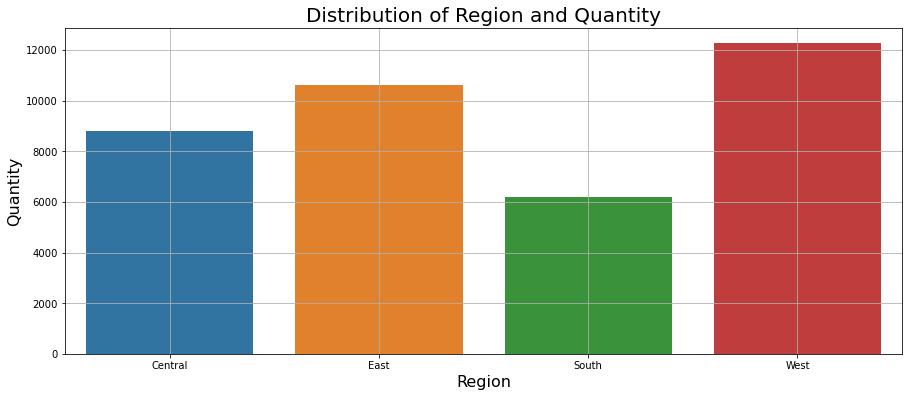

In [58]:
count2('Region','Quantity',region)

<b> The most Quantity is sold to West Region while the lesat Quantity is siold to South Region. </b>

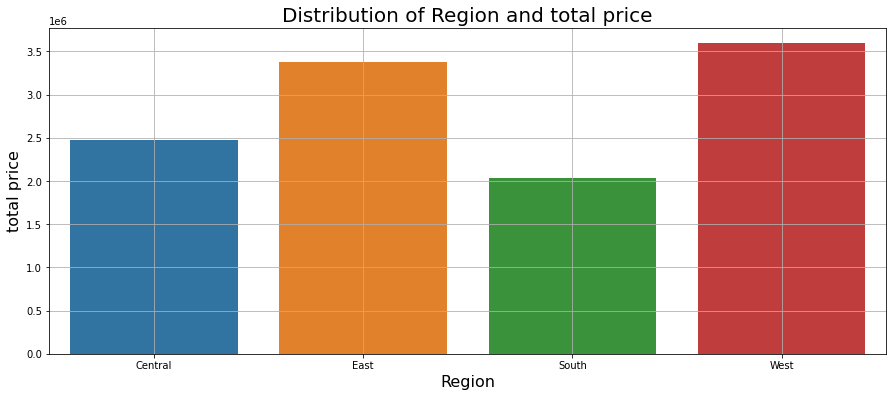

In [59]:
count2('Region','total price',region)

<b>Total revenue generated from the region as through west Region there is maximum sales</b>

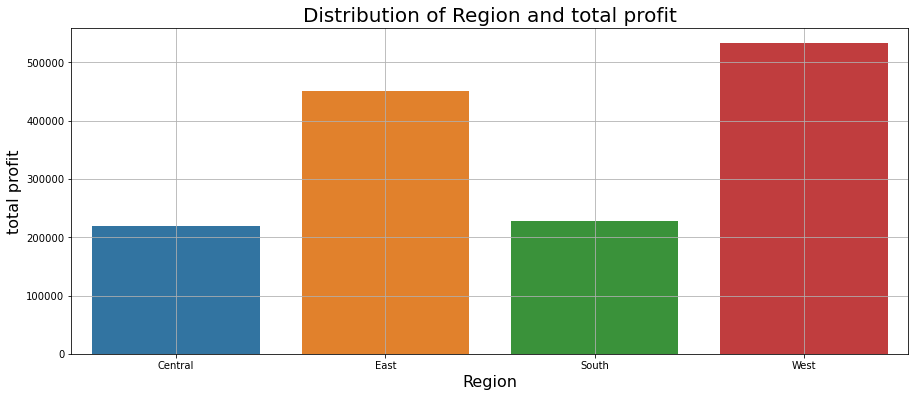

In [60]:
count2('Region','total profit',region)

<b> As the Quantity and sales are maximum at West and East region thus the profit generate will be high there.  
    But the point to note here is that Central and South generate the same amount of Profit though the QUantity supplied to Central is very high.</b>

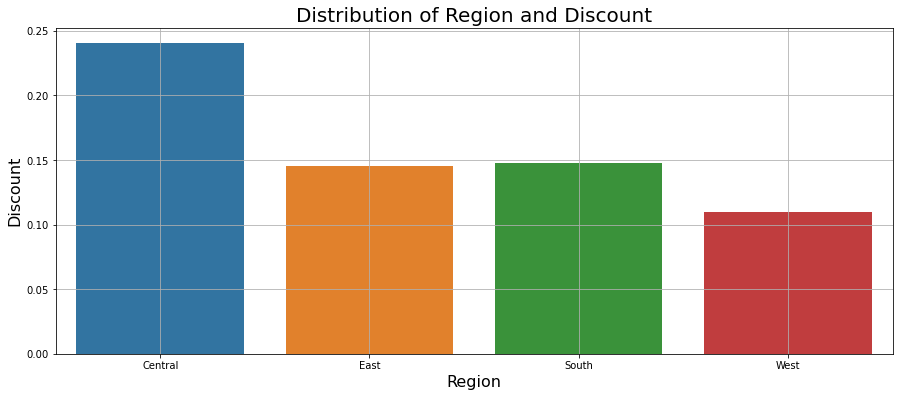

In [61]:
count2('Region','Discount',region_dis)

<b> As predicted, the maximum Discount is given to Central region and thus generating the least profit. And the region West which generate the most profit given the least Discount</b>

## <font color="red">CONCLUSION ON REGION</font>
<b>From the above graph it is very much clear that The region which were given high discount does not yelding high Discount.  
Rather it the Quantity of the goods supplied to the region that are yelding high result that is more quantity of goods more Profit</b>

## Checking for Categories

In [62]:
categoryp = retail.groupby(['Category','State','Segment','ship_mode'])[['total price','total profit','Quantity']].sum().reset_index()
categoryd = retail.groupby(['Category','Segment','ship_mode'])['Discount'].mean().reset_index().sort_values('Discount',ascending=False)


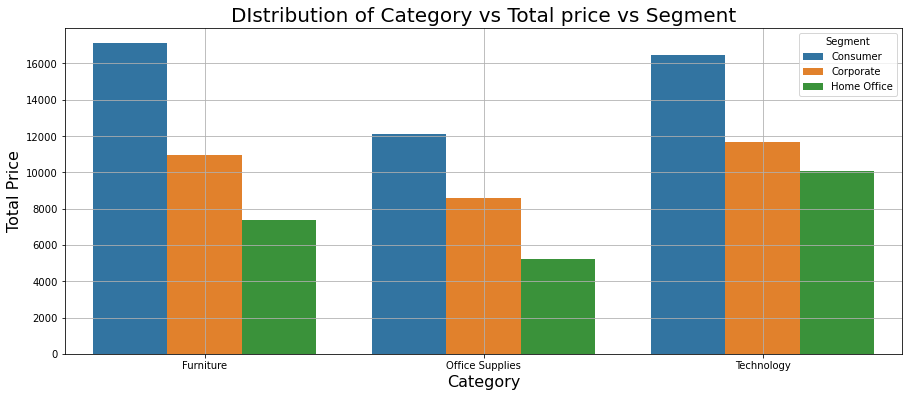

In [63]:
fig,ax=plt.subplots(figsize=(15,6))
plot=sns.barplot(x='Category',y='total price',hue='Segment' , data=categoryp, ax=ax, ci=None)
plt.xlabel('Category',fontsize=16)
plt.ylabel('Total Price',fontsize=16)
plt.title('DIstribution of Category vs Total price vs Segment',fontsize=20)
plt.grid()

<b>From this graph we can get the following result:  
    In Funrniture category Customer bought the most Item and Home Office is the least.  
    In Office Supplies again Consumer bought the most Item and least by Home Office.  
     In Technology agin Consumer bought the most Item and least by Home Office.  

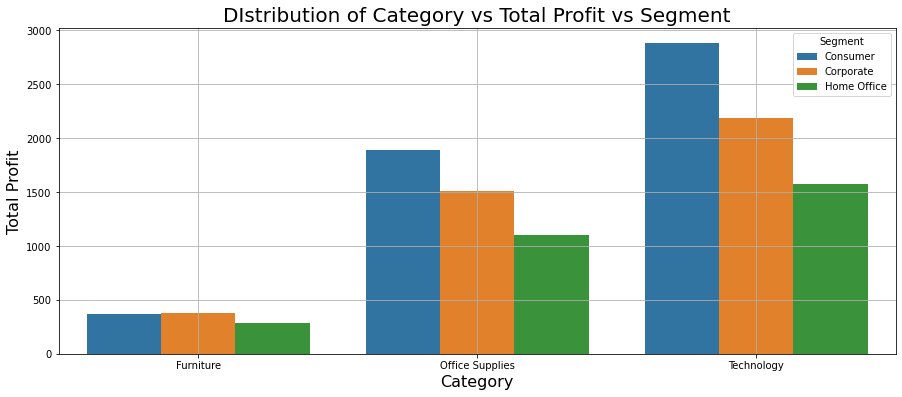

In [64]:
fig,ax=plt.subplots(figsize=(15,6))
plot=sns.barplot(x='Category',y='total profit',hue='Segment' , data=categoryp, ax=ax, ci=None)
plt.xlabel('Category',fontsize=16)
plt.ylabel('Total Profit',fontsize=16)
plt.title('DIstribution of Category vs Total Profit vs Segment',fontsize=20)
plt.grid()

<b> From the above graph we get the following information:  
    Though the ost product is bought by the Furniture but the overall good profit is generated by Technology</b>

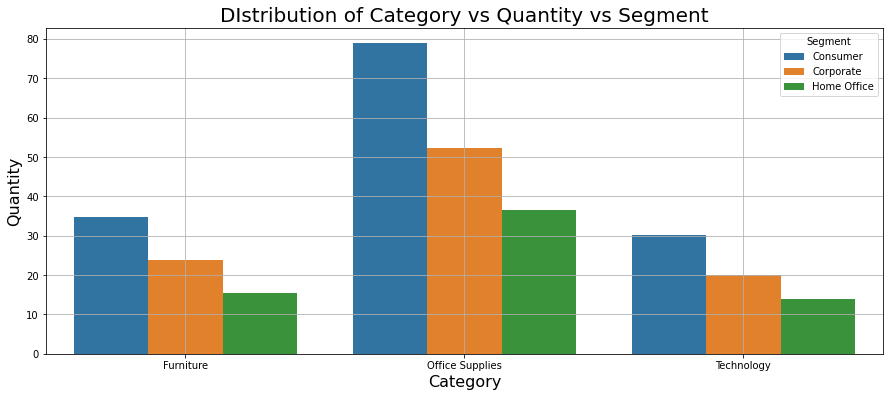

In [65]:
fig,ax=plt.subplots(figsize=(15,6))
plot=sns.barplot(x='Category',y='Quantity',hue='Segment' , data=categoryp, ax=ax, ci=None)
plt.xlabel('Category',fontsize=16)
plt.ylabel('Quantity',fontsize=16)
plt.title('DIstribution of Category vs Quantity vs Segment',fontsize=20)
plt.grid()

<b> Although the maximum profit is generated through Technology and maximum price after selling is generated through Furniture, TGe maximum Quantity of goods is sent For Office Supplies </b>

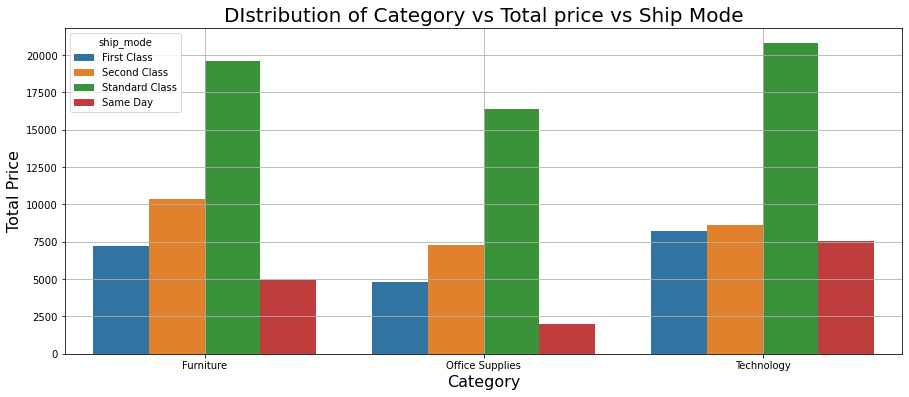

In [66]:
fig,ax=plt.subplots(figsize=(15,6))
plot=sns.barplot(x='Category',y='total price',hue='ship_mode' , data=categoryp, ax=ax, ci=None)
plt.xlabel('Category',fontsize=16)
plt.ylabel('Total Price',fontsize=16)
plt.title('DIstribution of Category vs Total price vs Ship Mode',fontsize=20)
plt.grid()

<b> In shipping mode the maximum is generated through Standard class in all three Category.  

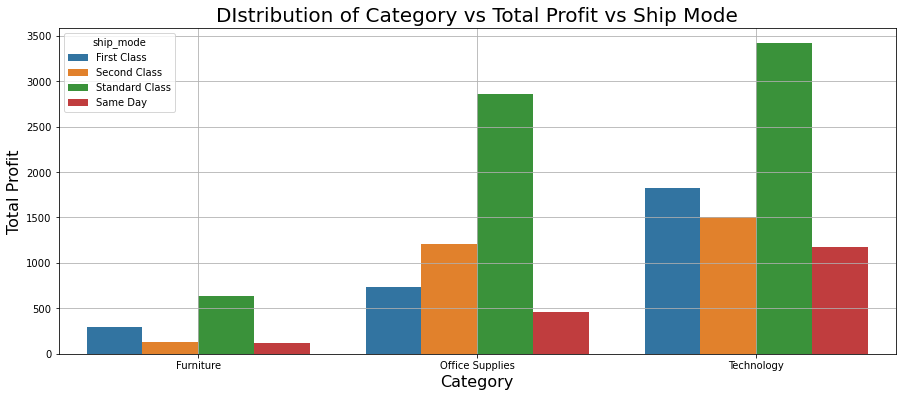

In [67]:
fig,ax=plt.subplots(figsize=(15,6))
plot=sns.barplot(x='Category',y='total profit',hue='ship_mode' , data=categoryp, ax=ax, ci=None)
plt.xlabel('Category',fontsize=16)
plt.ylabel('Total Profit',fontsize=16)
plt.title('DIstribution of Category vs Total Profit vs Ship Mode',fontsize=20)
plt.grid()

<b>Total profit is generated through Technolgy.

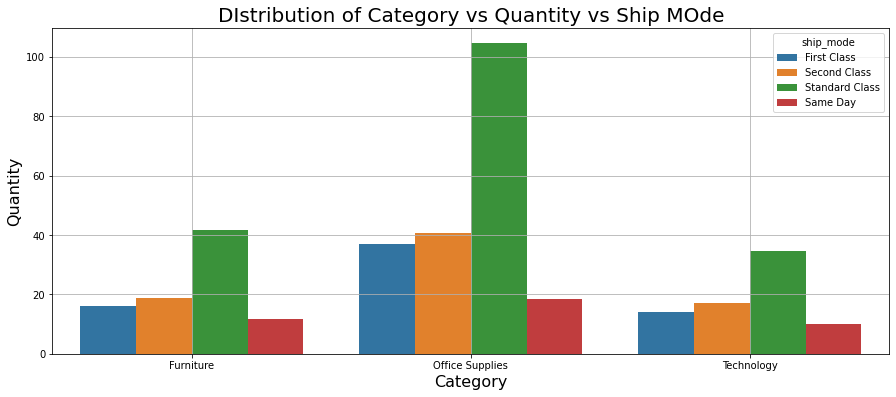

In [68]:
fig,ax=plt.subplots(figsize=(15,6))
plot=sns.barplot(x='Category',y='Quantity',hue='ship_mode' , data=categoryp, ax=ax, ci=None)
plt.xlabel('Category',fontsize=16)
plt.ylabel('Quantity',fontsize=16)
plt.title('DIstribution of Category vs Quantity vs Ship MOde',fontsize=20)
plt.grid()

<b> Though the maximum profit is generated through Technology but here we can see that they demand the least amount of quantity.

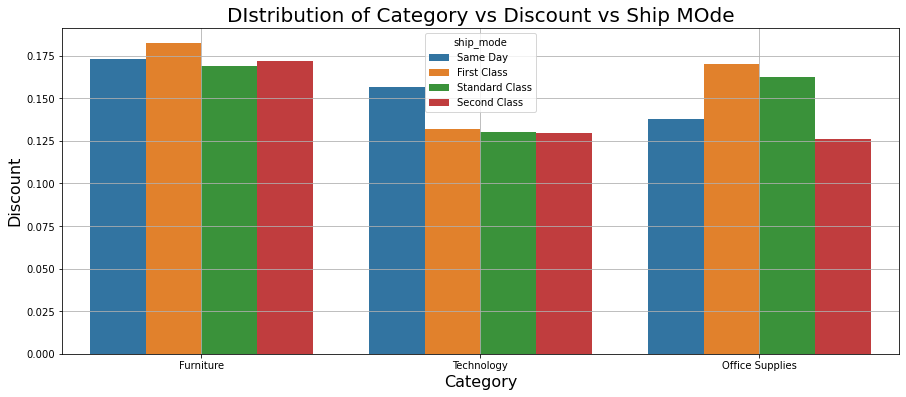

In [69]:
fig,ax=plt.subplots(figsize=(15,6))
plot=sns.barplot(x='Category',y='Discount',hue='ship_mode' , data=categoryd, ax=ax, ci=None)
plt.xlabel('Category',fontsize=16)
plt.ylabel('Discount',fontsize=16)
plt.title('DIstribution of Category vs Discount vs Ship MOde',fontsize=20)
plt.grid()

<b> From the above graph it is clear that maximum Discount is given to Furniture, followed by Office supplies and Technology.  
    Though the Technology produce the high amount of profit, it is not given high discount.</b>

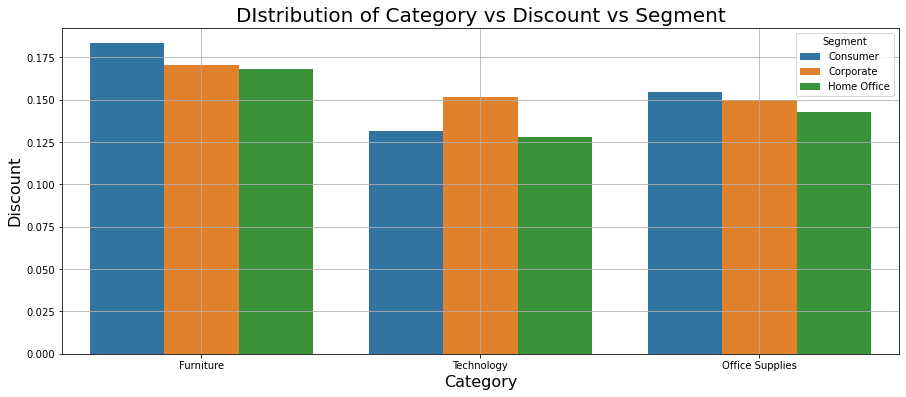

In [70]:
fig,ax=plt.subplots(figsize=(15,6))
plot=sns.barplot(x='Category',y='Discount',hue='Segment' , data=categoryd, ax=ax, ci=None)
plt.xlabel('Category',fontsize=16)
plt.ylabel('Discount',fontsize=16)
plt.title('DIstribution of Category vs Discount vs Segment',fontsize=20)
plt.grid()

<b> In all the three case if we look at the graph very carefull we get to know that in all category and all segments, maximum discount is given in Furniture.  </b>

## <font color="Red">CONCLUSION OF CATEGORY</font>
<b> The profit does not depends on the discount as in the above graph says, when the discount is low in case of technology even then also it produces high Profits. </b>

## Checking for Sub-Products

In [71]:
sproduct = retail.groupby(['Scategory','State','Country','Segment','ship_mode'])[['total profit','total price','Quantity']].sum().reset_index()

In [72]:
def dchart(column1,column2,label,table):
    fig,ax=plt.subplots(figsize=(16,5))
    plot=sns.barplot(x=column1,y=column2,data=table,hue=label,ax=ax,ci=None)
    plt.xlabel(f'{column1}',fontsize=16)
    plt.ylabel(f'{column2}',fontsize=16)
    plt.title('Distribution of {} vs {} vs {}'.format(column1,column2,label),fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    plt.grid()

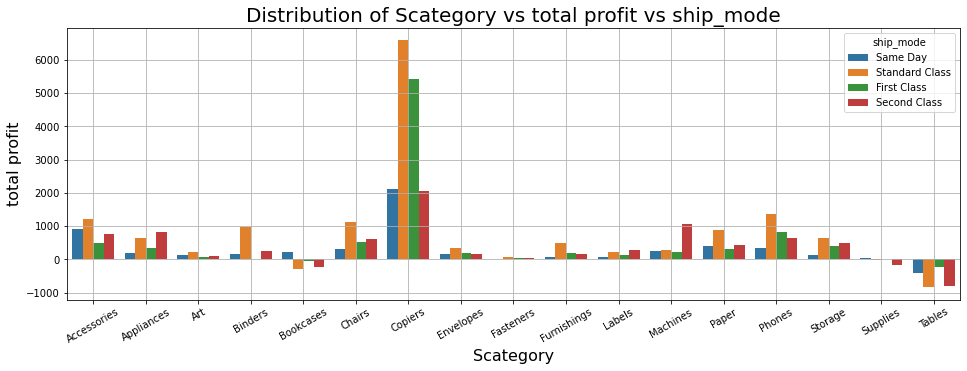

In [73]:
dchart('Scategory','total profit','ship_mode',sproduct)

<b>Most of the sub products performed and generated profit mainly when the mode of the shipping was Standard class. But tables generated negative profit.</b>

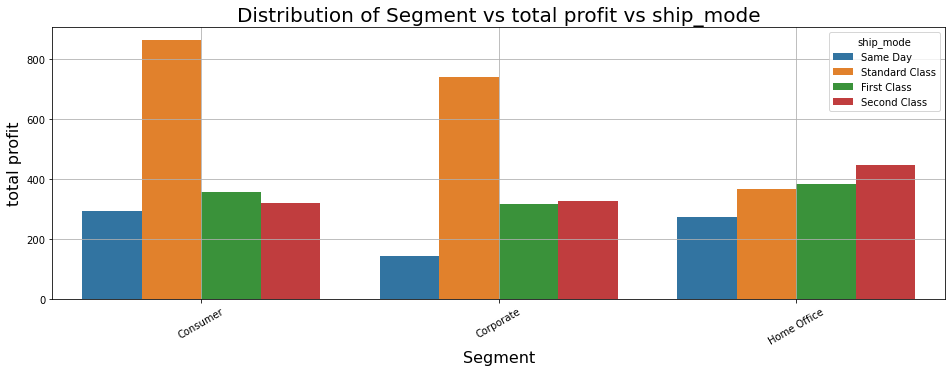

In [74]:
dchart('Segment','total profit','ship_mode',sproduct)

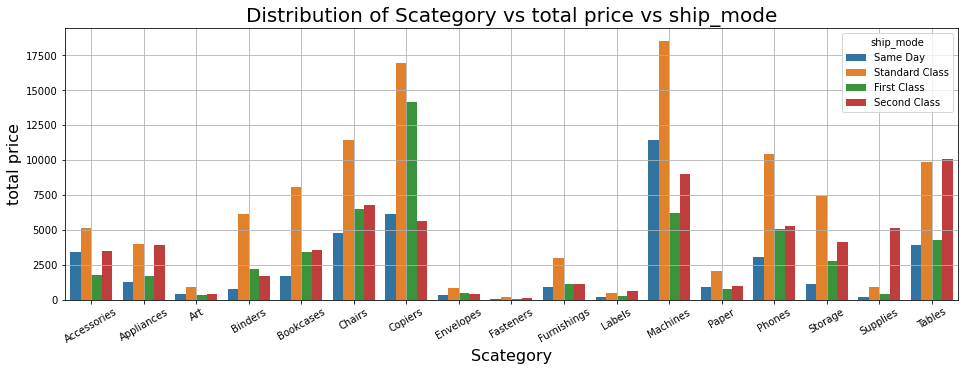

In [75]:
dchart('Scategory','total price','ship_mode',sproduct)

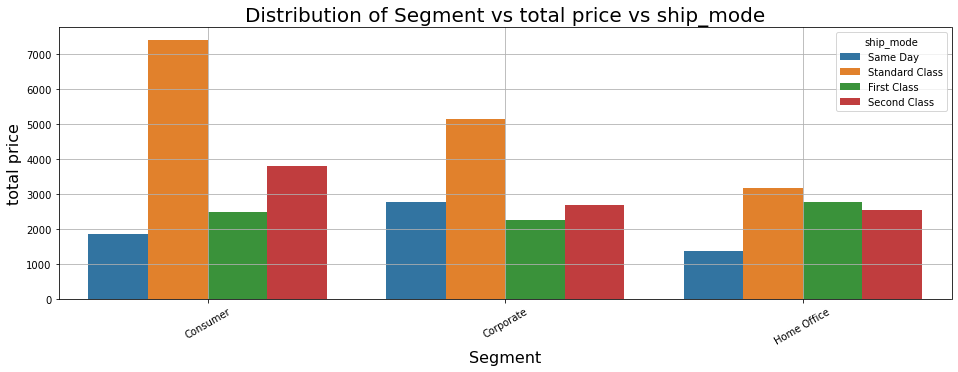

In [76]:
dchart('Segment','total price','ship_mode',sproduct)

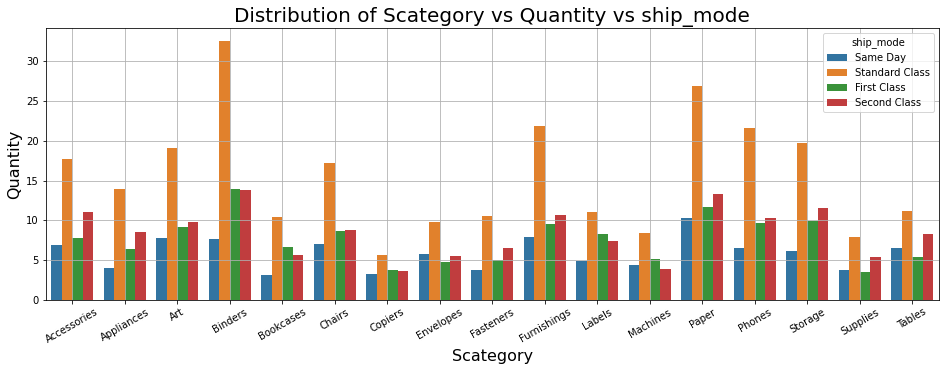

In [77]:
dchart('Scategory','Quantity','ship_mode',sproduct)

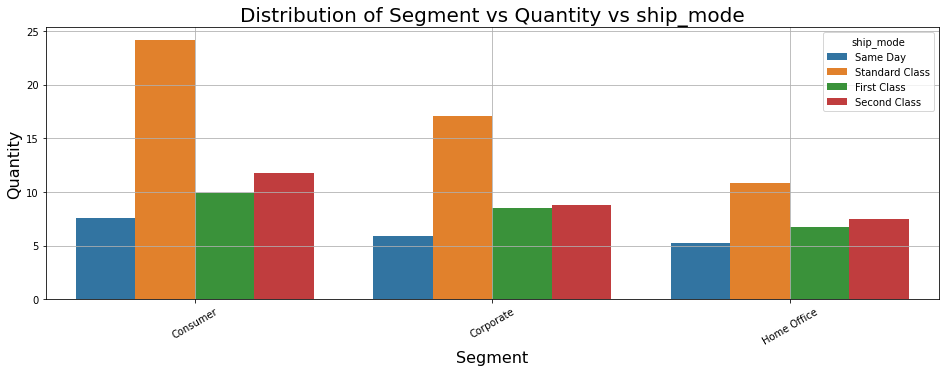

In [78]:
dchart('Segment','Quantity','ship_mode',sproduct)

In [79]:
seg_dic=retail.groupby(['Segment','ship_mode','Scategory','Category'])['Discount'].mean().reset_index()

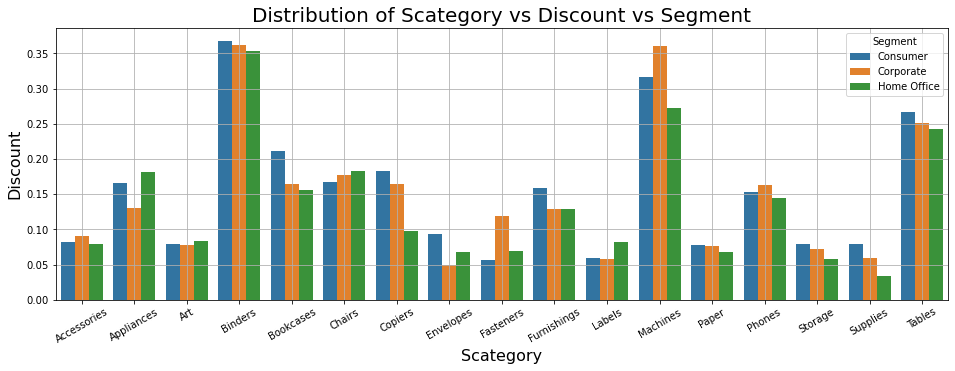

In [80]:
dchart('Scategory','Discount','Segment',seg_dic)

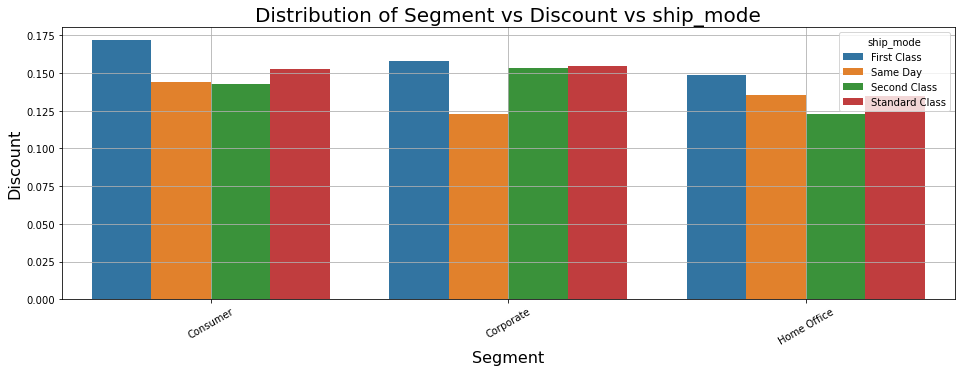

In [81]:
dchart('Segment','Discount','ship_mode',seg_dic)

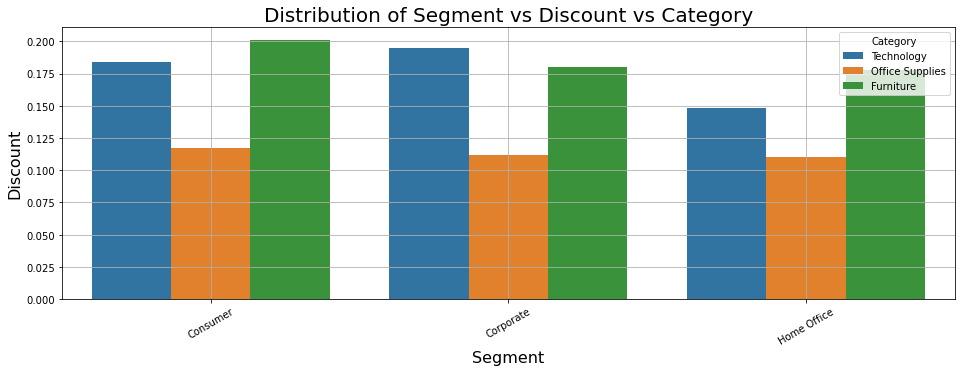

In [82]:
dchart('Segment','Discount','Category',seg_dic)

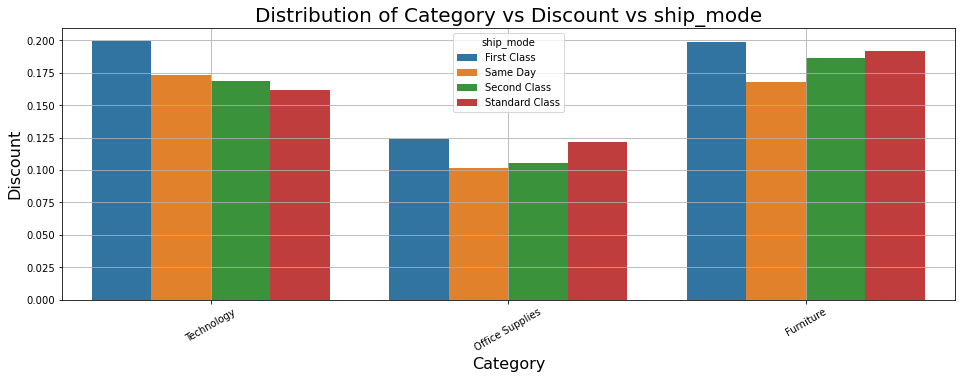

In [83]:
dchart('Category','Discount','ship_mode',seg_dic)

In [84]:
statewise_data=retail.groupby(['State','Category'])['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False)[:50]
statewise_data1=retail.groupby(['State','Category'])['total profit'].sum().reset_index().sort_values('total profit',ascending=False)[:50]
statewise_data2=retail.groupby(['State','Category'])['total price'].sum().reset_index().sort_values('total price',ascending=False)[:50]
statewise_data3=retail.groupby(['State','ship_mode'])['total profit'].sum().reset_index().sort_values('total profit',ascending=False)[:50]
statewise_data4=retail.groupby(['State','ship_mode'])['total price'].sum().reset_index().sort_values('total price',ascending=False)[:50]
statewise_data5=retail.groupby(['State','ship_mode'])['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False)[:50]

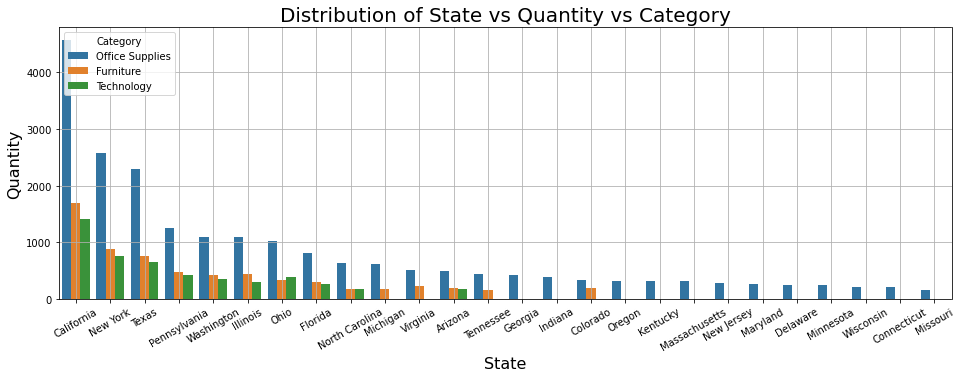

In [85]:
dchart('State','Quantity','Category',statewise_data)

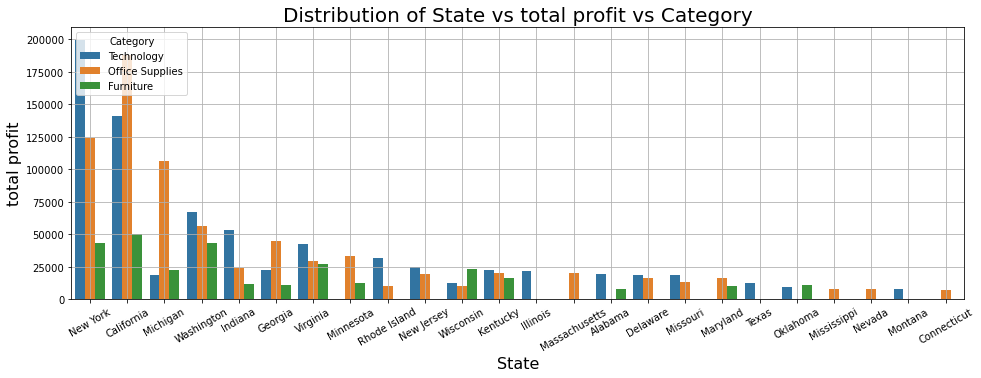

In [86]:
dchart('State','total profit','Category',statewise_data1)

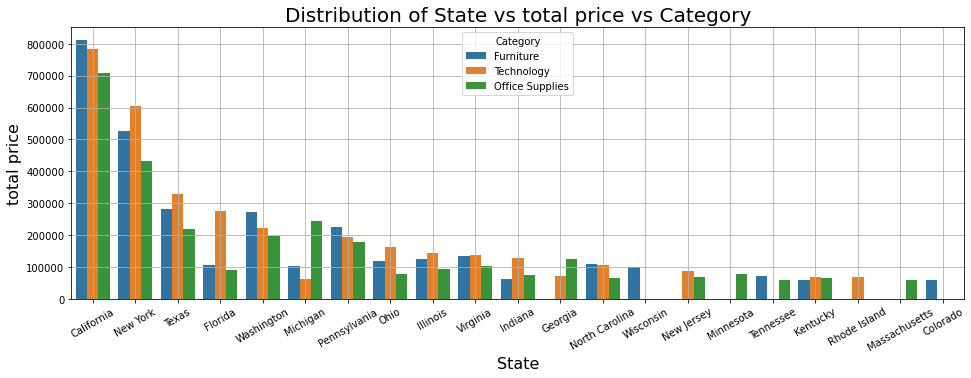

In [87]:
dchart('State','total price','Category',statewise_data2)

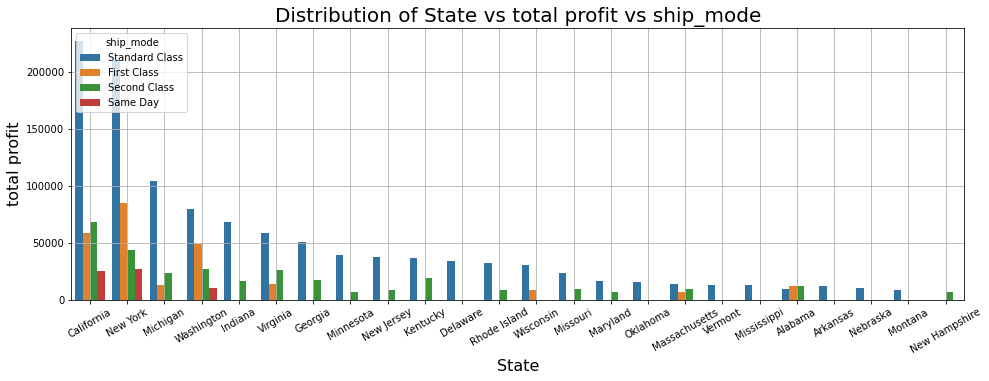

In [88]:
dchart('State','total profit','ship_mode',statewise_data3)

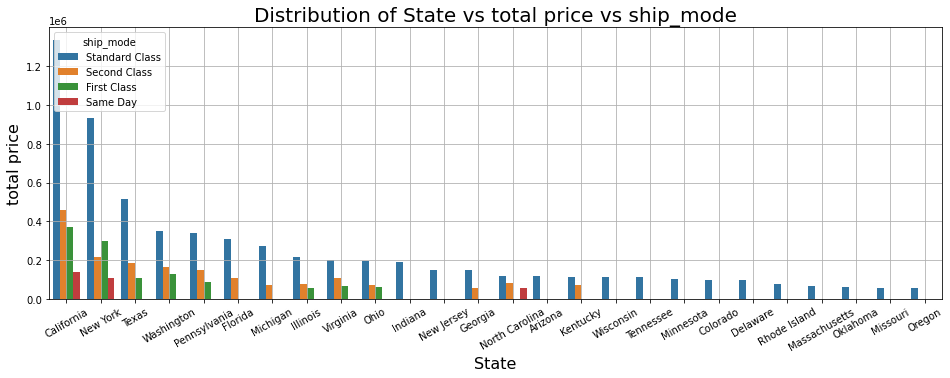

In [89]:
dchart('State','total price','ship_mode',statewise_data4)

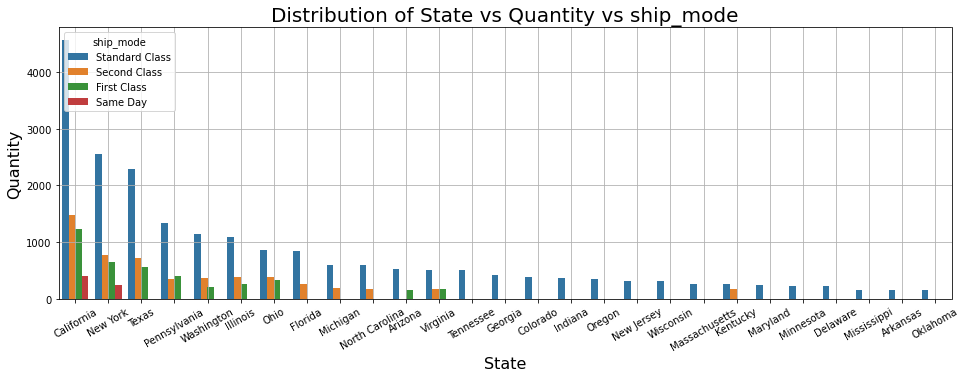

In [90]:
dchart('State','Quantity','ship_mode',statewise_data5)

# CONCLUSION 
*   <b> Shipping MOde :</b> Through Same Day Shipping mode there is least amount of quantity being sold, least profit and least price output because there the Discount given to Same day is ZERO. <b> Discount need to increase</b>.
*   <b> Segment:</b>Though there is equal amount of discount is given to both COnsumer and Corporate then also Corporate unable to make profit.The reason is that the quantity is being supplied to Corporate is less than that of Consumer.<b>If the sufficient supply is given to Corporate then it can generate more profit than Consumer.</b>
*   <b> State: </b>The reason why most of the countries is yelding negative profit is because of high DISCOUNT and High supply. <b> It is very important to reduce the Discount in order to make profit.</b>
*   <b> Region: </b>Within the central region very high discount is given, So inorder to make more profit we need to reduce discount.
*   <b> Category:</b> From the analysos it is very much clear that People doesn't their product on the same dat rather they want their product and thus if be increase the quality of other as well with increase the rate the profit will definitely increase.